# Table of Contents
 <p><div class="lev1"><a href="#Hidden-Markov-Model----SP500-prediction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hidden Markov Model -- SP500 prediction</a></div>

In [1]:
import numpy as np
import scipy as sp
from markov_models import *
%pylab inline
import pandas as pd
from pandas_datareader import data
import datetime

Populating the interactive namespace from numpy and matplotlib


# Hidden Markov Model -- SP500 prediction

In [2]:
style.use("seaborn-poster")

In [10]:
symbol = 'SPX'
data_source='morningstar'
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2018,5,23)

df = data.DataReader(symbol, data_source, start_date, end_date)

In [11]:
df = df.dropna()
df.index = pd.MultiIndex.droplevel(df.index)

In [12]:
t_ = df.index[1:]
r_ = np.diff(np.log(df.Close))

In [13]:
t_train = 300
l_ = np.array([0]*t_train + [1]*(r_.size-t_train))
r_train = r_[:t_train]
r_test = r_[t_train:]
#

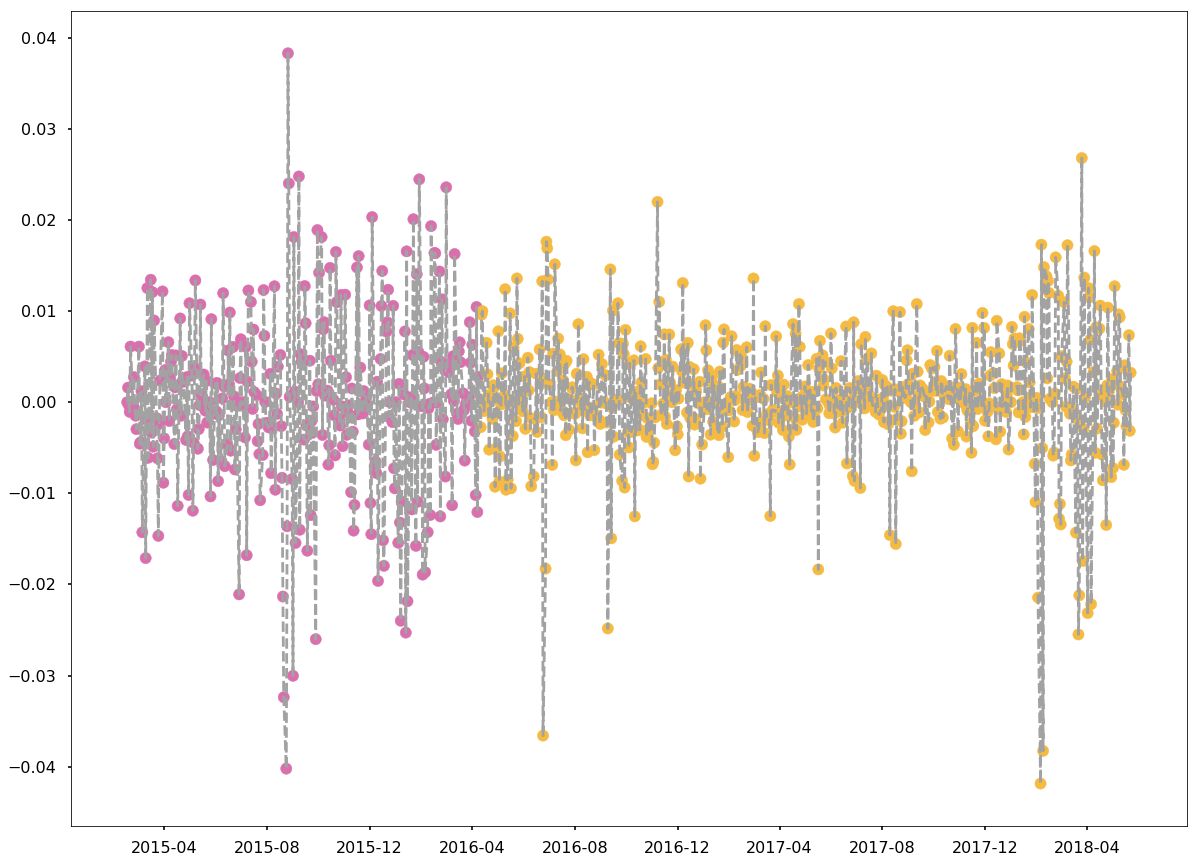

In [15]:
figure(figsize=(20,15))
plot(t_, r_, '--', c=cc_[-1])
scatter(t_, r_, c=cc_[l_*9])

In [33]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param)

[1. 1. 1. 1. 1.] 1.0


In [34]:
hmm.fit(r_train)

EM converged within 153 steps


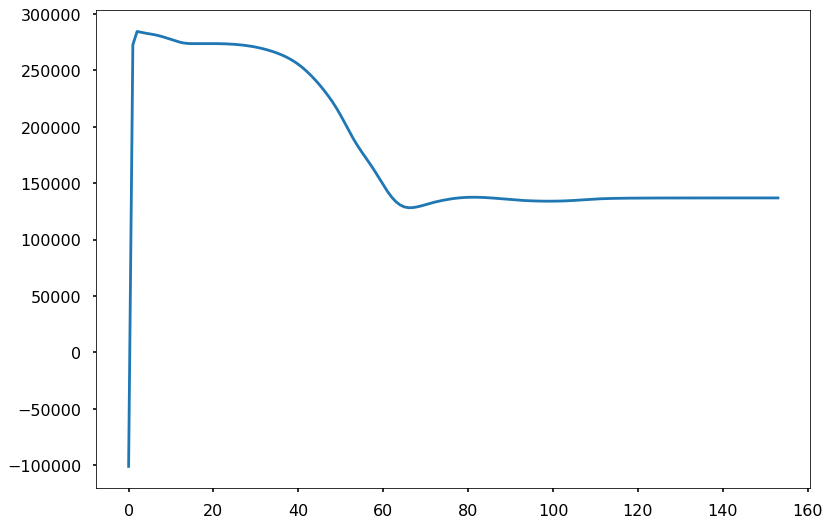

In [35]:
plot(hmm._Q_)

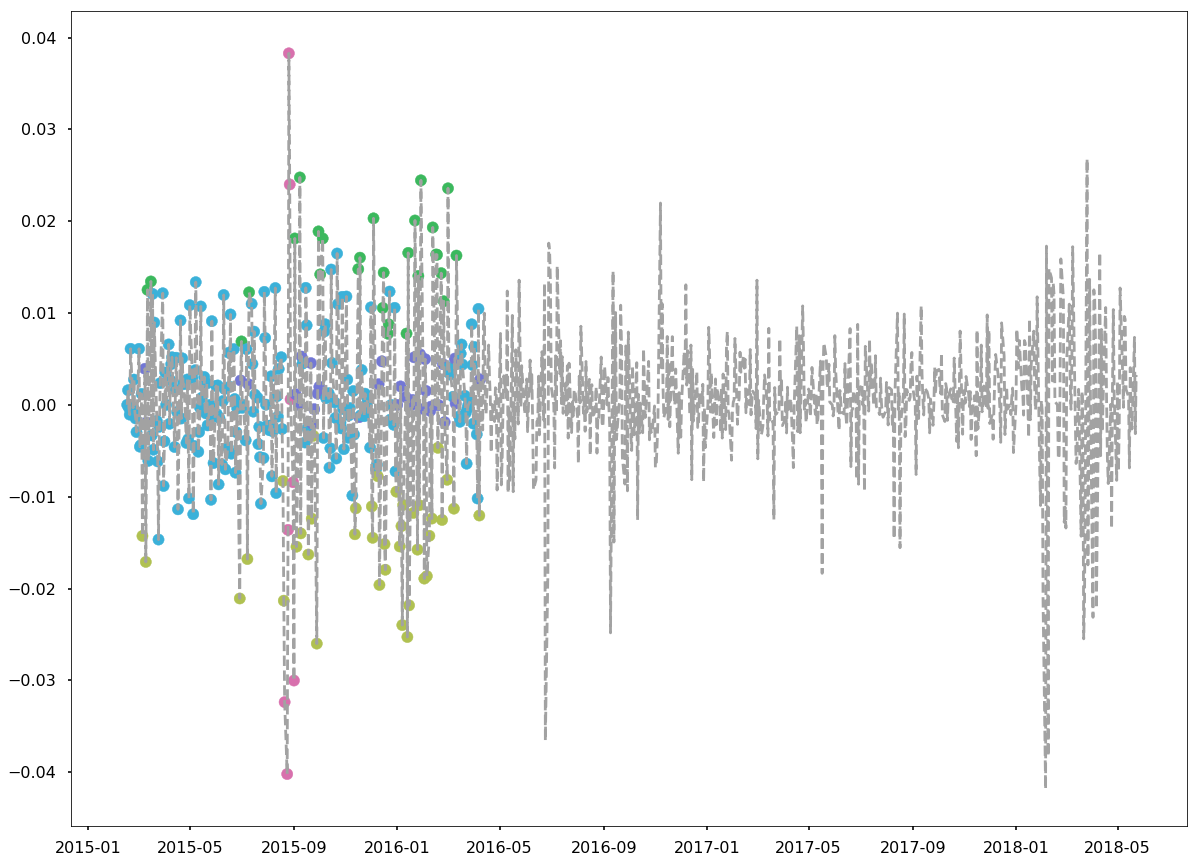

In [36]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(20,15))
plot(t_, r_, '--', c=cc_[-1])
scatter(t_[:t_train], r_train, c=cc_[z_*2])

In [37]:
hmm.export_params()

{'initial': array([0.00000000e+000, 9.10028969e-248, 1.00000000e+000, 1.15680088e-290,
        0.00000000e+000]),
 'transition': array([[8.41407839e-01, 3.09097769e-10, 1.08779926e-48, 1.58592161e-01,
         1.08008482e-22],
        [2.12593828e-26, 1.76815585e-01, 3.08534024e-16, 4.58367672e-01,
         3.64816743e-01],
        [2.64320637e-22, 5.61059363e-25, 9.40166459e-01, 8.44436470e-24,
         5.98335405e-02],
        [7.23804721e-34, 2.23305544e-01, 3.54093379e-01, 1.36785004e-01,
         2.85816074e-01],
        [3.82904960e-02, 5.75309000e-01, 4.09425803e-15, 2.22074423e-01,
         1.64326081e-01]]),
 'emission': {'type': 'normal',
  'mean': array([-0.00825979,  0.00140712,  0.00048842,  0.01497953, -0.01387439]),
  'variance': array([5.95623721e-04, 7.25693188e-06, 3.68424041e-05, 2.47525045e-05,
         3.23864964e-05])}}

In [45]:
def predict_plot(days, hmm_obj, r_test=None):
    x,y = hmm_obj.get_forcast_probability(days, n_sig=6)
    x *= 100
    fill_between(x[x<=0], 0, y[x<=0], color=cc_[-3])
    fill_between(x[x>0], 0, y[x>0], color=cc_[5])
    
    mean = hmm_obj.predict_observation(days, "mean")
    mode = hmm_obj.predict_observation(days, "mode")
    if r_test is not None:
        axvline(r_test[days]*100, ls = '-', color=cc_[-1], label="actual")
    axvline(mean*100, ls = '--', color='w', label="forcast: mean")
    axvline(mode*100, ls = ':', color=cc_[-1], label="forcast: mode")
    xlim(-10,10)
    ylim(0, y.max()*1.25)
    xlabel("log return %")
    legend(loc=0)

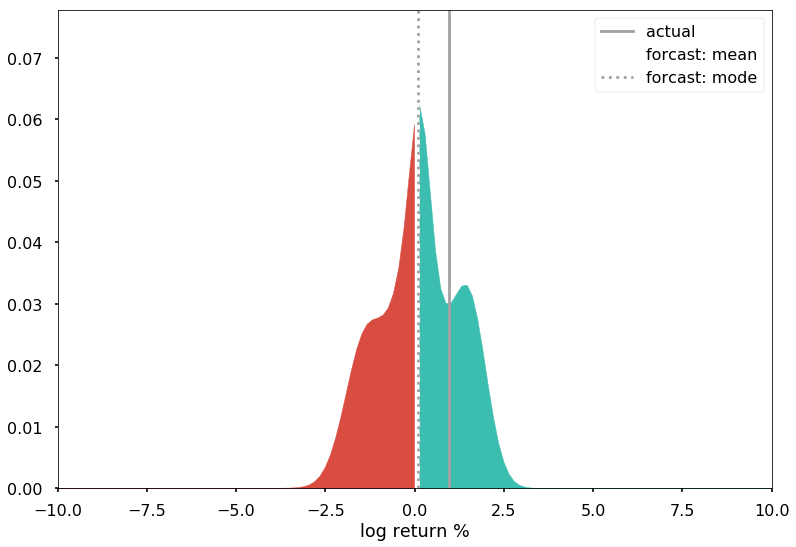

In [46]:
predict_plot(1, hmm, r_test)

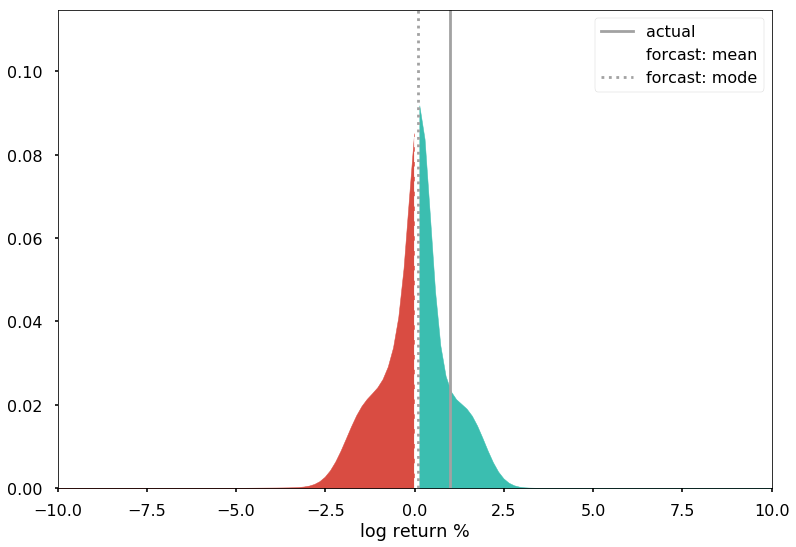

In [47]:
predict_plot(2, hmm, r_test)

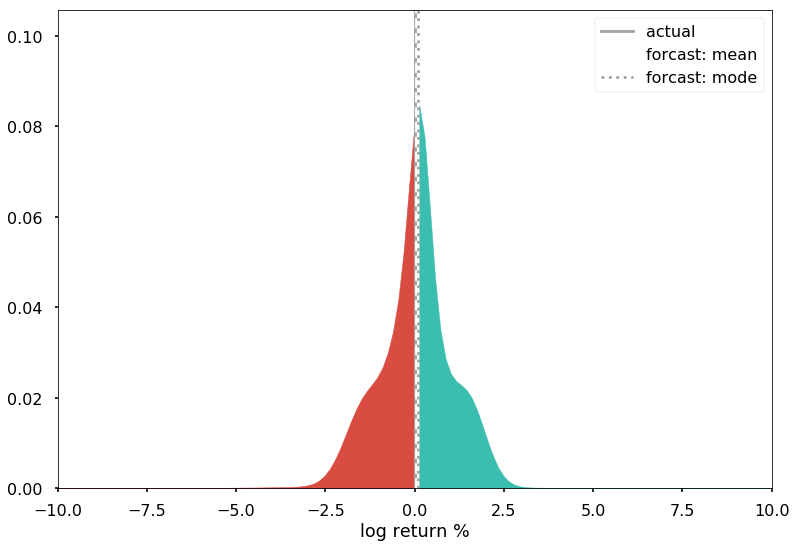

In [48]:
predict_plot(3, hmm, r_test)

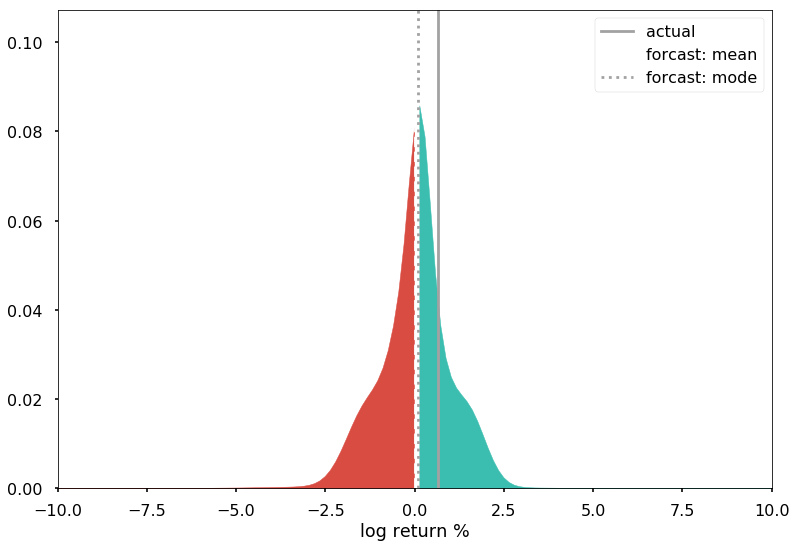

In [49]:
predict_plot(5, hmm, r_test)

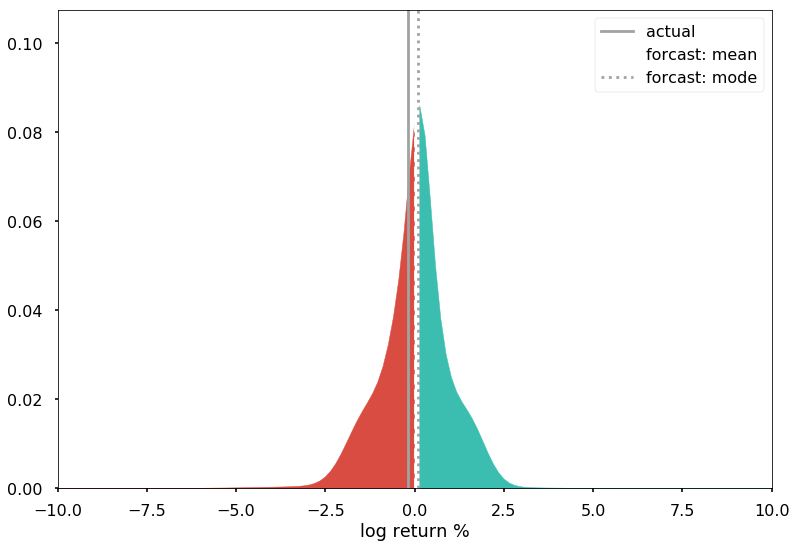

In [50]:
predict_plot(10, hmm, r_test)

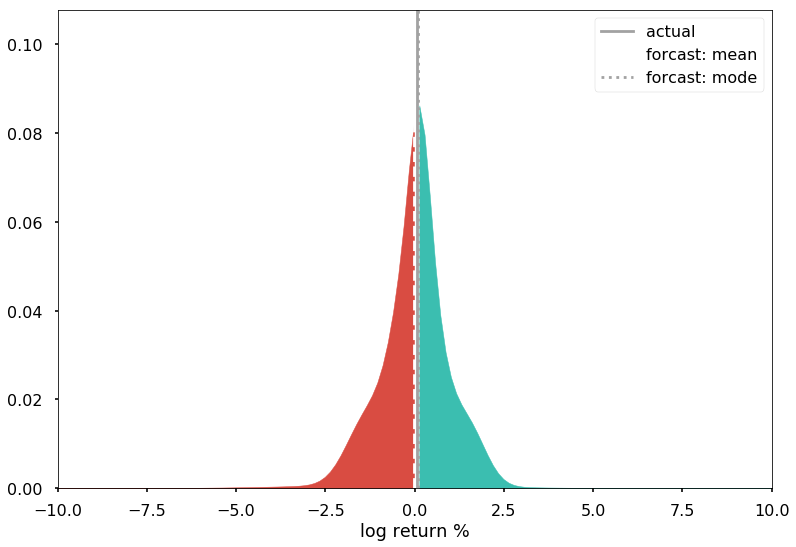

In [51]:
predict_plot(20, hmm, r_test)

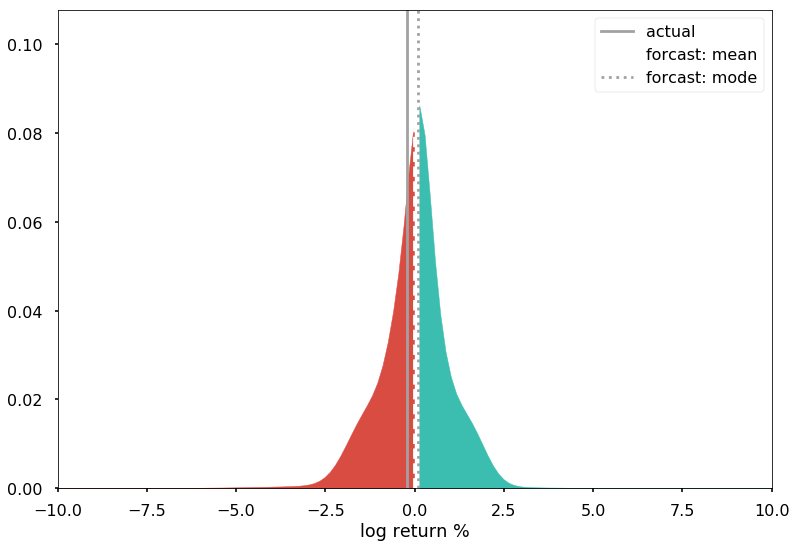

In [52]:
predict_plot(30, hmm, r_test)

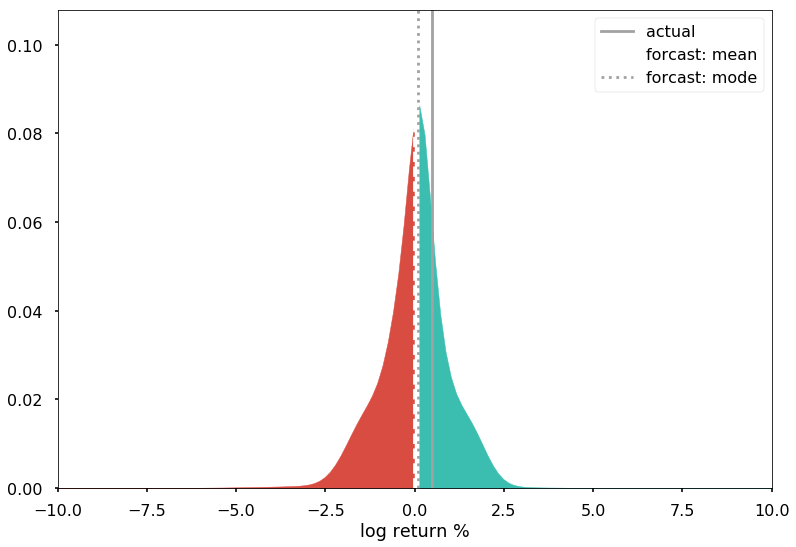

In [53]:
predict_plot(40, hmm, r_test)

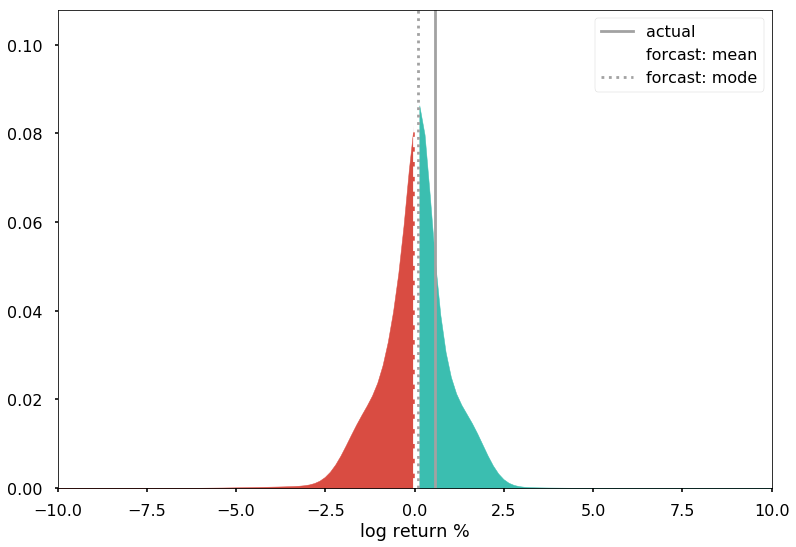

In [54]:
predict_plot(50, hmm, r_test)

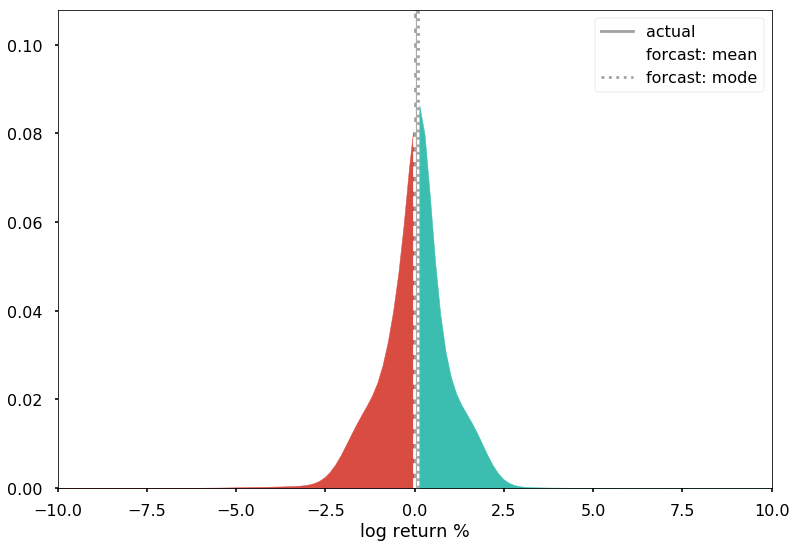

In [55]:
predict_plot(60, hmm, r_test)

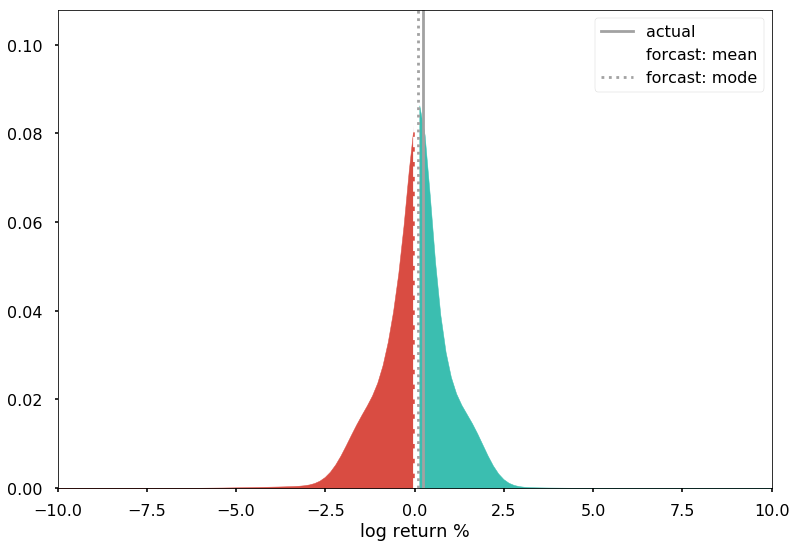

In [56]:
predict_plot(70, hmm, r_test)

[1. 1. 1. 1. 1.] 1.0
EM converged within 424 steps


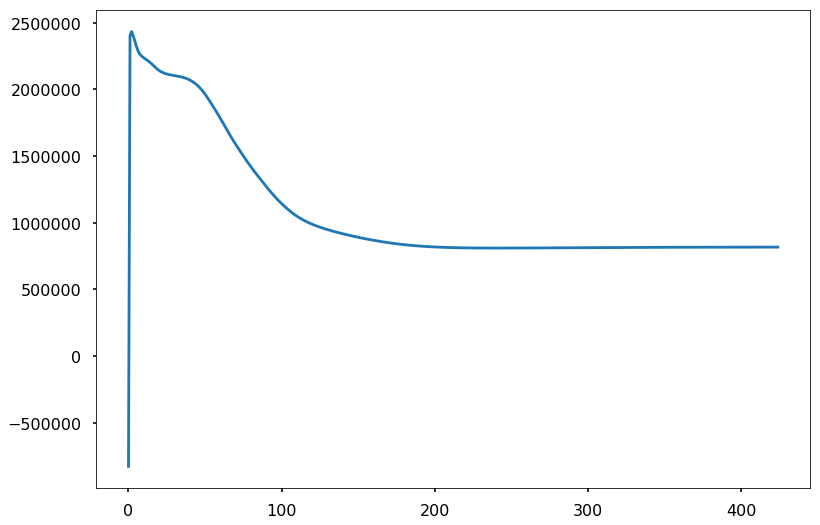

In [57]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden).round(5); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)).round(5); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param)
hmm.fit(r_)
plot(hmm._Q_)

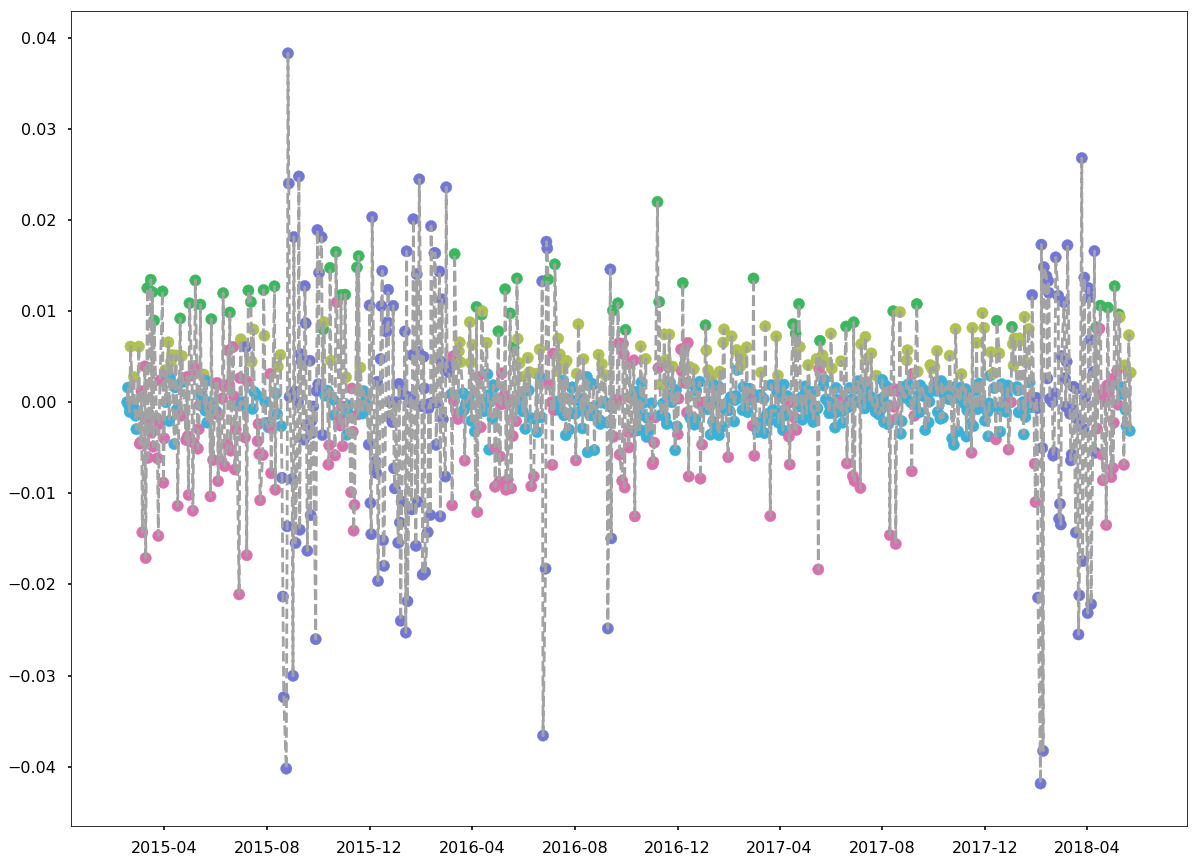

In [59]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(20,15))
plot(t_, r_, '--', c=cc_[-1])
scatter(t_, r_, c=cc_[z_*2])

In [60]:
print(hmm.export_params())

{'initial': array([0., 0., 1., 0., 0.]), 'transition': array([[6.01545603e-001, 4.18330496e-003, 1.16015041e-001,
        2.34235249e-001, 4.40208026e-002],
       [2.27851464e-053, 9.53271430e-001, 2.35577015e-107,
        4.67285701e-002, 7.11863787e-057],
       [1.61239142e-001, 2.40748369e-002, 5.59961129e-001,
        1.16614552e-019, 2.54724893e-001],
       [7.30457336e-001, 3.90613711e-035, 1.77046646e-002,
        1.71867942e-002, 2.34651205e-001],
       [1.19751493e-021, 4.57928806e-112, 8.14161735e-001,
        1.16681796e-089, 1.85838265e-001]]), 'emission': {'type': 'normal', 'mean': array([-0.00252485, -0.00146329, -0.00039305,  0.01037111,  0.00464818]), 'variance': array([3.24016033e-05, 2.05803639e-04, 3.77060696e-06, 1.49282539e-05,
       7.35554584e-06])}}


In [69]:
hmm.predict_observation(1, 'mode')

-0.0003819487116012363

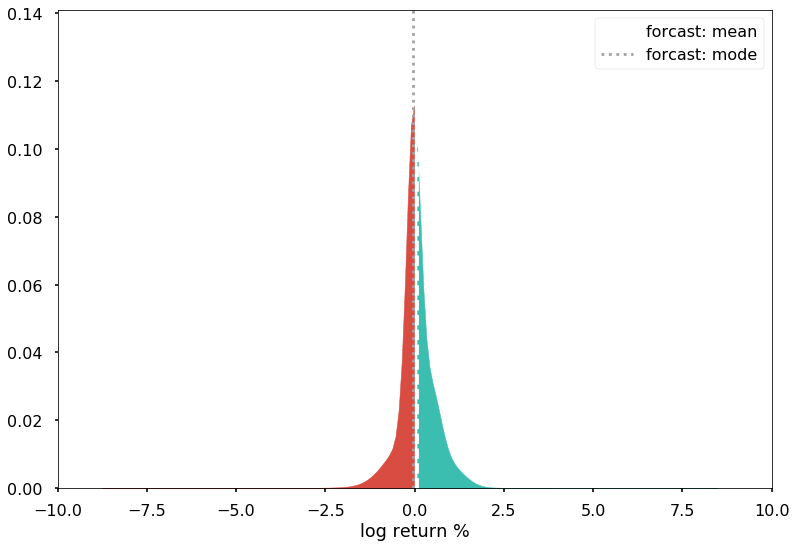

In [62]:
predict_plot(1, hmm)

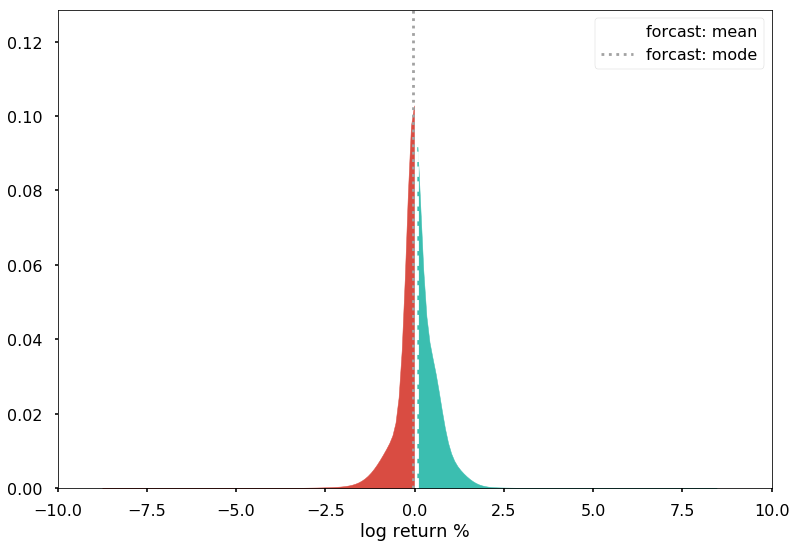

In [63]:
predict_plot(2, hmm)

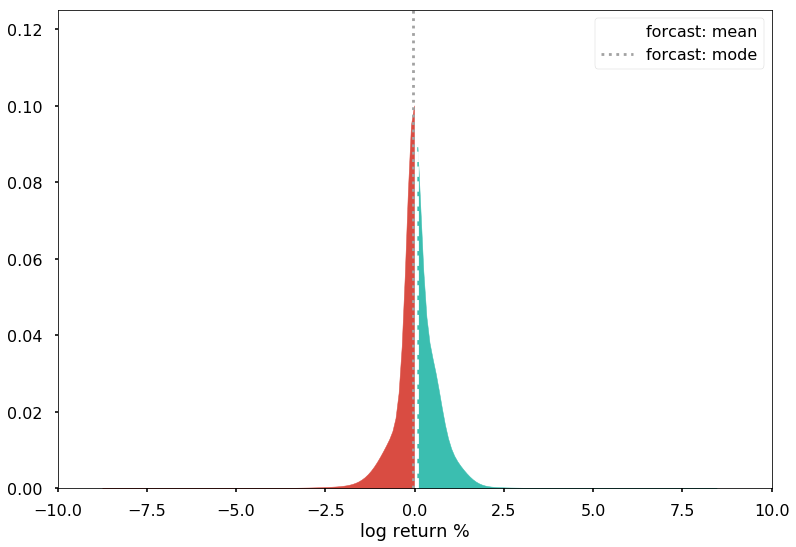

In [64]:
predict_plot(3, hmm)

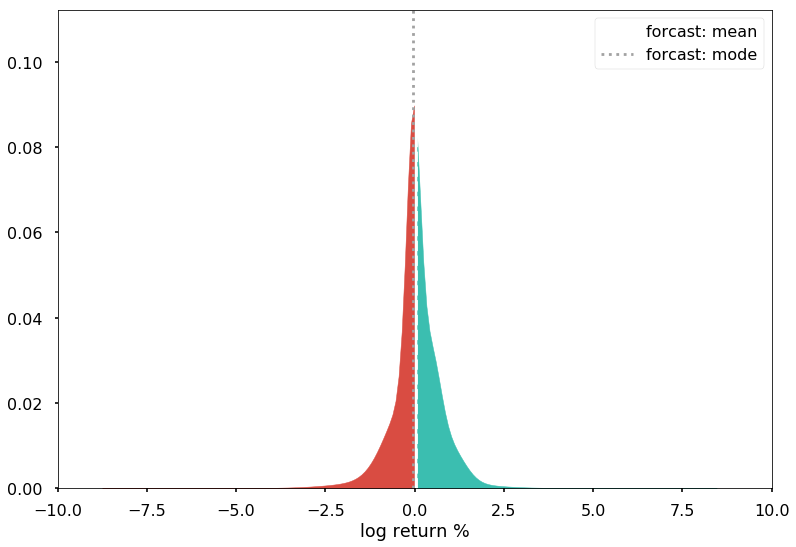

In [65]:
predict_plot(10, hmm)

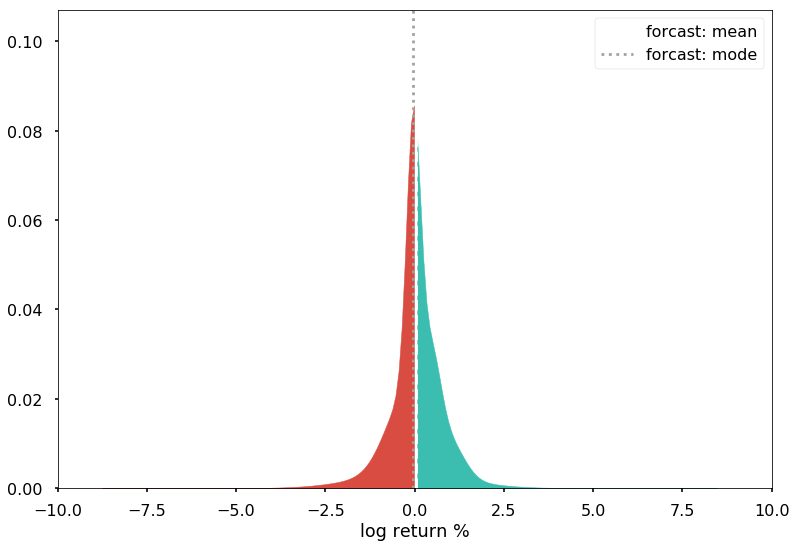

In [66]:
predict_plot(20, hmm)

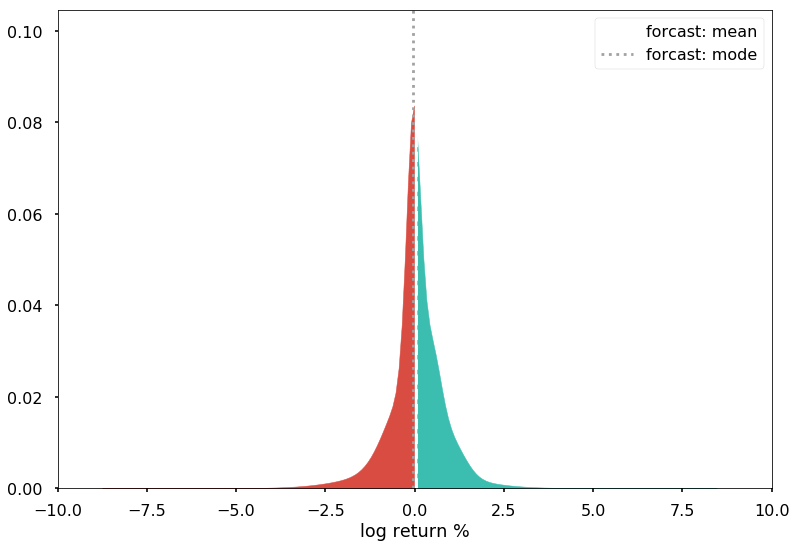

In [67]:
predict_plot(30, hmm)

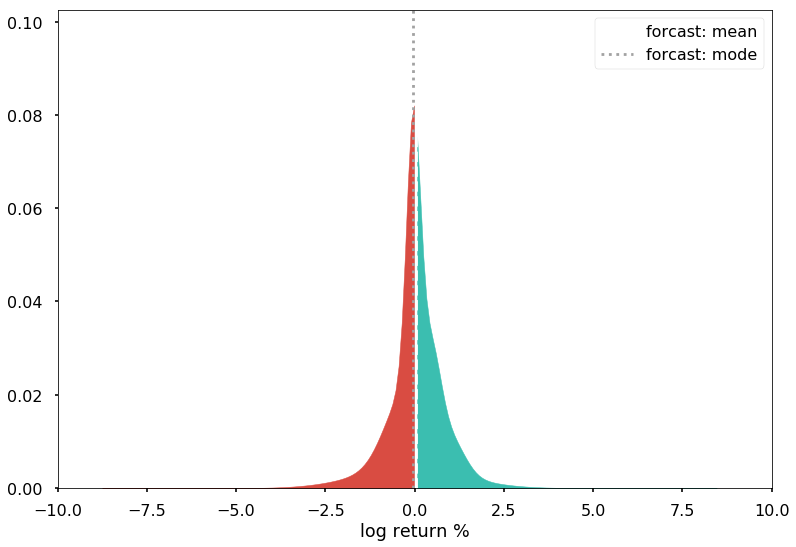

In [68]:
predict_plot(50, hmm)